In [94]:
import numpy as np
import matplotlib.pyplot as plt


def plot_turb(ax, x, y, ndens, Vx, Vy, Vz, width=2):
    ax.pcolormesh(x, y, ndens, cmap="inferno")
    ax.streamplot(
        x,
        y,
        Vx,
        Vy,
        color="w",
        density=2,
        linewidth=(Vx**2 + Vy**2 + Vz**2) / np.max(Vx**2 + Vy**2 + Vz**2) * width,
        arrowsize=1,
        arrowstyle="->",
    )

    ax.set(
        aspect=1,
        xlim=(x.min(), x.max()),
        ylim=(y.min(), y.max()),
    )

In [74]:
data = np.load("turb2d-256.npz")

In [75]:
xmin, xmax, ymin, ymax = -2500, 2500, -2500, 2500

x, y = data["x"], data["y"]
ndens = data["ndens"]

Vx, Vy, Vz = data["Vx"], data["Vy"], data["Vz"]

#### Tasks:

- [x] a photon propagates, and randomly scatters in the direction of the bulk velocity of the cell
    - [x] vary probability at each step and see what happens
- [ ] scattering probability depends on the density of the cell
    - [ ] define mean-free path for given density and vary it
    - [ ] define an "optical depth" for the whole box and vary it
- [ ] the photon gains/loses energy depending on the bulk velocity of the cell
    - [ ] transform to the rest frame of the cell (transform velocity & photon momentum)
    - [ ] scatter the photon in the rest frame (Compton formula)
    - [ ] transform back to the lab frame

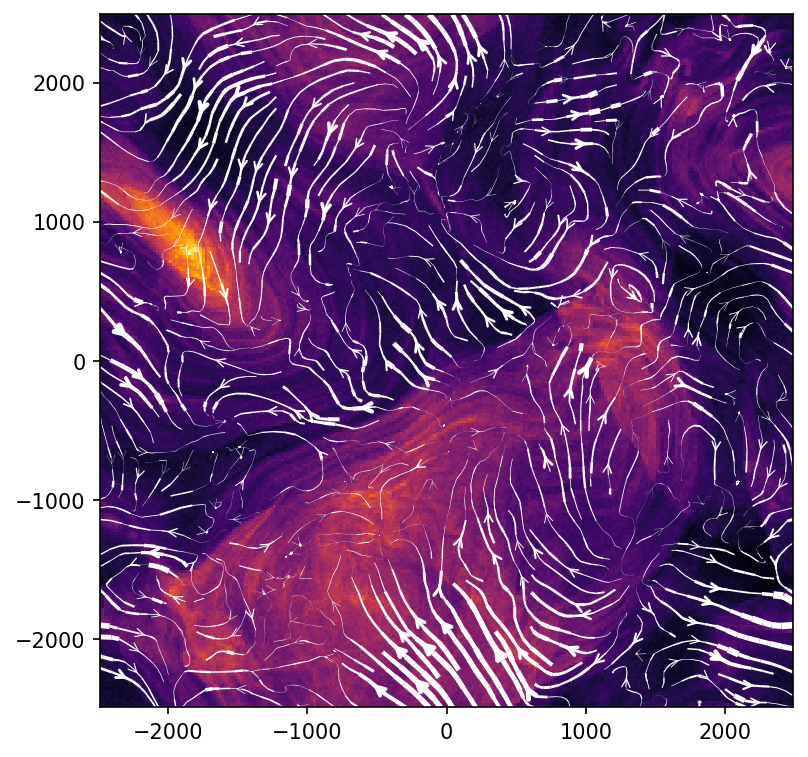

In [76]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=150)

plot_turb(ax, x, y, ndens, Vx, Vy, Vz)

Photon momentum ($c=1$, speed of light is equal to $1$):

$\bm{P} = (E/c) \hat{\bm{k}}$,

where $E$ is photon's energy, and $\hat{\bm{k}}$ is a unit vector (direction of motion).

$|\bm{P}| = E/c$ -- length of the vector $\bm{P}$.

$\bm{P} / |\bm{P}| = \hat{\bm{k}}$

$\bm{x}_{\rm new} = \bm{x}_{\rm old} + \bm{k} c \Delta t$

In [ ]:
sy, sx = ndens.shape

photon_pos = np.array(
    [
        [0, 0],
    ]
)
photon_mom = np.array(
    [
        [0.1, 1.0, 0],
    ]
)

rng = np.random.default_rng()


def advance(pos, mom, dt):
    # advance photon position
    newpos = pos + mom[:-1] / np.linalg.norm(mom) * dt
    # boundary conditions:
    if newpos[0] < xmin:
        newpos[0] += xmax - xmin
    if newpos[0] > xmax:
        newpos[0] -= xmax - xmin
    if newpos[1] < ymin:
        newpos[1] += ymax - ymin
    if newpos[1] > ymax:
        newpos[1] -= ymax - ymin

    newmom = mom.copy()

    # draw a random number
    rand = rng.random()
    if rand < 0.002 * dt:
        xph, yph = newpos
        ixph = int((xph - xmin) * sx / (xmax - xmin))
        iyph = int((yph - ymin) * sy / (ymax - ymin))
        vx = Vx[iyph, ixph]
        vy = Vy[iyph, ixph]
        vz = Vz[iyph, ixph]
        newmom = np.array([vx, vy, vz])
    return newpos, newmom


for _ in range(30000):
    photon_newpos, photon_newmom = advance(photon_pos[-1], photon_mom[-1], 0.1)
    photon_pos = np.vstack([photon_pos, photon_newpos])
    photon_mom = np.vstack([photon_mom, photon_newmom])

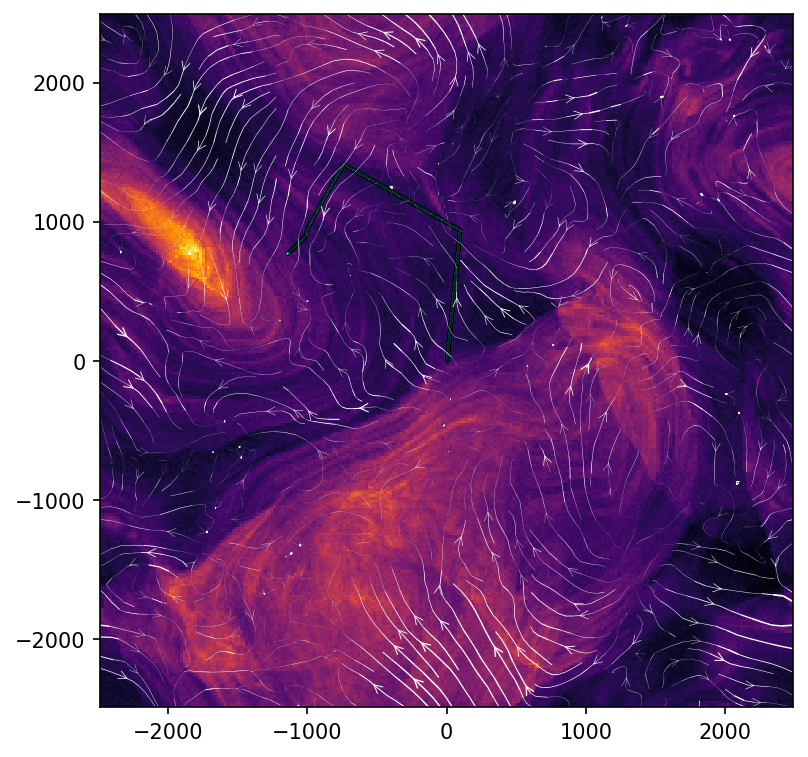

In [113]:
interval = 10

fig, ax = plt.subplots(figsize=(6, 6), dpi=150)

plot_turb(ax, x, y, ndens, Vx, Vy, Vz, width=1)

ax.scatter(photon_pos[:, 0][::interval], photon_pos[:, 1][::interval], color="cyan", s=2, edgecolor="k", lw=0.25)